Cross-Borehole example
======================
In this example we are going to invert one of the example given in the R2 manual. The aim is to detect a hidden block
in the bottom left of the picture as shown below:
and this pictures:

![Xhb.png](./img/Xbh.png)

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np # just for parsing the electrode position file
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/dc-2d-borehole/'
from resipy import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/resipy
ResIPy version =  2.2.2
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Then we will import the `protocol.dat` file that was outputed by the forward model with this geometry and invert it. Note what we also need to import the electrodes position from a .csv file with 3 columns:x, y, buried. The `buried` column contains 1 if the electrode is buried and 0 if not.

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy
clearing dirname
0/407 reciprocal measurements found.
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
ResIPy Estimated RAM usage = 0.009267 Gb
done
Writing .in file and protocol.dat... done!
--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.0 <<

 >> D a t e : 02 - 07 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >> 

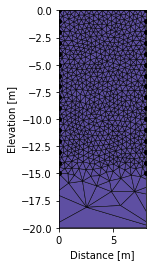

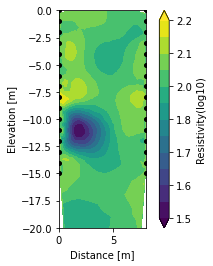

In [4]:
k = R2()
k.createSurvey(testdir + 'protocol.dat', ftype='ProtocolDC')
k.importElec(testdir + 'elec.csv')
k.createMesh('trian', cl=0.5, cl_factor=20, fmd=20)
# cl is characteristic length, it defines the resolution of the mesh around the electrodes, the smaller, the finer
# cl_factor is how the mesh will grow away from the electrode
# NOTE that a too fine mesh (very small cl) will takes a lot of RAM
# but a too coarse mesh won't be able to resolve the target
k.zlim = [-20, 0]
k.showMesh()
k.invert()
k.showResults(sens=False, contour=True)